# Classifying Shooting Incident Fatality

#### INCIDENT_KEY: 
A unique identifier for each shooting incident.
#### OCCUR_DATE: 
The date on which the shooting incident occurred.
#### OCCUR_TIME: 
The time at which the shooting incident occurred.
#### BORO: 
The borough in New York City where the incident took place.
#### LOC_OF_OCCUR_DESC: 
Describes the location of the occurrence.
#### PRECINCT: 
The police precinct where the incident occurred.
#### JURISDICTION_CODE: 
A code representing the jurisdiction responsible for the incident area. This might indicate whether the incident falls under NYPD, federal jurisdiction, or another entity.
#### LOC_CLASSFCTN_DESC: 
Describes the classification of the location.
#### LOCATION_DESC: 
A description of the specific location where the incident happened (e.g., street, building).
#### STATISTICAL_MURDER_FLAG: 
A flag indicating whether the incident resulted in a murder (True for murder, False otherwise).
#### PERP_AGE_GROUP: 
The age group of the perpetrator involved in the incident.
#### PERP_SEX: 
The sex of the perpetrator (M for male, F for female).
#### PERP_RACE: 
The race of the perpetrator.
#### VIC_AGE_GROUP: 
The age group of the victim.
#### VIC_SEX: 
The sex of the victim.
#### VIC_RACE: 
The race of the victim.
#### X_COORD_CD: 
X-coordinate in the NYC coordinate system, indicating the location of the incident.
#### Y_COORD_CD: 
Y-coordinate in the NYC coordinate system, indicating the location of the incident.
#### Latitude: 
The latitude of the incident location, in decimal degrees.
#### Longitude: 
The longitude of the incident location, in decimal degrees.
#### Lon_Lat: 
A geographic point combining the longitude and latitude, likely used for mapping the incident locations.

###### Importing Libraries

In [1]:
# 1. For handling data
import pandas as pd
import numpy as np

# 2. For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 3. For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

##### Loading dataset

In [2]:
df= pd.read_csv(r"X:\BIA Project 2\NYPD_Shooting_Incident_Data__Historic_.csv")

##### Printing first five rows of dataset

In [3]:
df.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     228798151   5/27/2021   21:30:00  QUEENS               NaN       105   
1     137471050   6/27/2014   17:40:00   BRONX               NaN        40   
2     147998800  11/21/2015    3:56:00  QUEENS               NaN       108   
3     146837977   10/9/2015   18:30:00   BRONX               NaN        44   
4      58921844   2/19/2009   22:58:00   BRONX               NaN        47   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
0                0.0                NaN           NaN   
1                0.0                NaN           NaN   
2                0.0                NaN           NaN   
3                0.0                NaN           NaN   
4                0.0                NaN           NaN   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0                    False  ...      NaN       NaN         18-24       M   
1                    False  ...      NaN       NaN         18-24       M   
2                     True  ...      NaN       NaN         25-44       M   
3                    False  ...      NaN       NaN           <18       M   
4                     True  ...        M     BLACK         45-64       M   

         VIC_RACE   X_COORD_CD   Y_COORD_CD   Latitude  Longitude  \
0           BLACK  1058925.000  180924.0000  40.662965 -73.730839   
1           BLACK  1005028.000  234516.0000  40.810352 -73.924942   
2           WHITE  1007667.938  209836.5313  40.742607 -73.915492   
3  WHITE HISPANIC  1006537.375  244511.1406  40.837782 -73.919457   
4           BLACK  1024921.813  262189.4063  40.886238 -73.852910   

                                         Lon_Lat  
0  POINT (-73.73083868899994 40.662964620000025)  
1   POINT (-73.92494232599995 40.81035186300006)  
2   POINT (-73.91549174199997 40.74260663300004)  
3   POINT (-73.91945661499994 40.83778200300003)  
4   POINT (-73.85290950899997 40.88623791800006)  

[5 rows x 21 columns]

##### Describing dataset

In [4]:
df.describe(include='all')

INCIDENT_KEY OCCUR_DATE OCCUR_TIME      BORO LOC_OF_OCCUR_DESC  \
count   2.731200e+04      27312      27312     27312              1716   
unique           NaN       5761       1421         5                 2   
top              NaN   7/5/2020   23:30:00  BROOKLYN           OUTSIDE   
freq             NaN         47        179     10933              1474   
mean    1.208605e+08        NaN        NaN       NaN               NaN   
std     7.341286e+07        NaN        NaN       NaN               NaN   
min     9.953245e+06        NaN        NaN       NaN               NaN   
25%     6.386088e+07        NaN        NaN       NaN               NaN   
50%     9.037222e+07        NaN        NaN       NaN               NaN   
75%     1.888102e+08        NaN        NaN       NaN               NaN   
max     2.611902e+08        NaN        NaN       NaN               NaN   

            PRECINCT  JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
count   27312.000000       27310.000000               1716   
unique           NaN                NaN                  9   
top              NaN                NaN             STREET   
freq             NaN                NaN               1103   
mean       65.635362           0.326913                NaN   
std        27.305705           0.737743                NaN   
min         1.000000           0.000000                NaN   
25%        44.000000           0.000000                NaN   
50%        68.000000           0.000000                NaN   
75%        81.000000           0.000000                NaN   
max       123.000000           2.000000                NaN   

                    LOCATION_DESC STATISTICAL_MURDER_FLAG  ... PERP_SEX  \
count                       12335                   27312  ...    18002   
unique                         40                       2  ...        4   
top     MULTI DWELL - PUBLIC HOUS                   False  ...        M   
freq                         4832                   22046  ...    15439   
mean                          NaN                     NaN  ...      NaN   
std                           NaN                     NaN  ...      NaN   
min                           NaN                     NaN  ...      NaN   
25%                           NaN                     NaN  ...      NaN   
50%                           NaN                     NaN  ...      NaN   
75%                           NaN                     NaN  ...      NaN   
max                           NaN                     NaN  ...      NaN   

       PERP_RACE VIC_AGE_GROUP VIC_SEX VIC_RACE    X_COORD_CD     Y_COORD_CD  \
count      18002         27312   27312    27312  2.731200e+04   27312.000000   
unique         8             7       3        7           NaN            NaN   
top        BLACK         25-44       M    BLACK           NaN            NaN   
freq       11432         12281   24686    19439           NaN            NaN   
mean         NaN           NaN     NaN      NaN  1.009449e+06  208127.401617   
std          NaN           NaN     NaN      NaN  1.837783e+04   31886.377756   
min          NaN           NaN     NaN      NaN  9.149281e+05  125756.718800   
25%          NaN           NaN     NaN      NaN  1.000029e+06  182834.335950   
50%          NaN           NaN     NaN      NaN  1.007731e+06  194486.570300   
75%          NaN           NaN     NaN      NaN  1.016838e+06  239518.468800   
max          NaN           NaN     NaN      NaN  1.066815e+06  271127.687500   

            Latitude     Longitude  \
count   27302.000000  27302.000000   
unique           NaN           NaN   
top              NaN           NaN   
freq             NaN           NaN   
mean       40.737892    -73.909051   
std         0.087525      0.066272   
min        40.511586    -74.249303   
25%        40.668481    -73.943027   
50%        40.700318    -73.915221   
75%        40.824067    -73.882330   
max        40.910818    -73.702046   

                                             Lon_Lat  


## Data Preprecessing

##### Checking shape of dataset

In [5]:
df.shape

(27312, 21)

##### Checking unique values of columns

In [6]:
for x in df.columns:
    print(f"Unique values in {x}:")
    print(df[x].value_counts())
    print("\n")

Unique values in INCIDENT_KEY:
INCIDENT_KEY
173354054    18
94424905     12
33706902     12
24717013     12
212640102    12
             ..
25658628      1
54474353      1
61618854      1
195700548     1
239861542     1
Name: count, Length: 21420, dtype: int64


Unique values in OCCUR_DATE:
OCCUR_DATE
7/5/2020     47
9/4/2011     31
7/26/2020    29
8/11/2007    26
9/4/2006     25
             ..
3/23/2009     1
5/30/2012     1
5/11/2019     1
3/15/2018     1
10/5/2022     1
Name: count, Length: 5761, dtype: int64


Unique values in OCCUR_TIME:
OCCUR_TIME
23:30:00    179
0:30:00     156
1:30:00     153
2:00:00     148
21:00:00    145
           ... 
9:02:00       1
11:44:00      1
6:09:00       1
7:59:00       1
11:19:00      1
Name: count, Length: 1421, dtype: int64


Unique values in BORO:
BORO
BROOKLYN         10933
BRONX             7937
QUEENS            4094
MANHATTAN         3572
STATEN ISLAND      776
Name: count, dtype: int64


Unique values in LOC_OF_OCCUR_DESC:
LOC_OF_OCCUR_D

##### Checking missing values in dataset

In [7]:
df.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

In [8]:
# Percentage of missing values
missing_percentage= (df.isnull().sum()/len(df)*100).sort_values(ascending=False)
missing_percentage

LOC_OF_OCCUR_DESC          93.717047
LOC_CLASSFCTN_DESC         93.717047
LOCATION_DESC              54.836702
PERP_AGE_GROUP             34.212068
PERP_RACE                  34.087581
PERP_SEX                   34.087581
Longitude                   0.036614
Latitude                    0.036614
Lon_Lat                     0.036614
JURISDICTION_CODE           0.007323
STATISTICAL_MURDER_FLAG     0.000000
OCCUR_DATE                  0.000000
PRECINCT                    0.000000
VIC_AGE_GROUP               0.000000
VIC_SEX                     0.000000
VIC_RACE                    0.000000
X_COORD_CD                  0.000000
Y_COORD_CD                  0.000000
BORO                        0.000000
OCCUR_TIME                  0.000000
INCIDENT_KEY                0.000000
dtype: float64

##### As two of the columns got more than 90% of missing values so we will drop them as they may affect the performance of model

In [9]:
df_1= df.drop(columns=['LOC_CLASSFCTN_DESC','LOC_OF_OCCUR_DESC'])

##### Identifying columns of missing values that are needed to be imputed

In [10]:
missing_data_cols= df_1.isnull().sum()[df_1.isnull().sum()>0].index.tolist()
missing_data_cols

['JURISDICTION_CODE',
 'LOCATION_DESC',
 'PERP_AGE_GROUP',
 'PERP_SEX',
 'PERP_RACE',
 'Latitude',
 'Longitude',
 'Lon_Lat']

##### Checking value counts of 'Location Desc' column

In [11]:
df_1['LOCATION_DESC'].value_counts()

LOCATION_DESC
MULTI DWELL - PUBLIC HOUS    4832
MULTI DWELL - APT BUILD      2835
(null)                        977
PVT HOUSE                     951
GROCERY/BODEGA                694
BAR/NIGHT CLUB                628
COMMERCIAL BLDG               292
RESTAURANT/DINER              204
NONE                          175
BEAUTY/NAIL SALON             112
FAST FOOD                     104
SOCIAL CLUB/POLICY LOCATI      72
GAS STATION                    71
HOSPITAL                       65
LIQUOR STORE                   41
SMALL MERCHANT                 37
STORE UNCLASSIFIED             36
HOTEL/MOTEL                    35
DRY CLEANER/LAUNDRY            31
SUPERMARKET                    21
DRUG STORE                     14
CLOTHING BOUTIQUE              14
JEWELRY STORE                  12
TELECOMM. STORE                11
VARIETY STORE                  11
SHOE STORE                     10
DEPT STORE                      9
FACTORY/WAREHOUSE               8
VIDEO STORE                     8


##### Replacing ( null ) and NONE with 'unknown' in 'LOCATION_DESC' column.

In [12]:
# Replacing (null) with unknown.
df_1['LOCATION_DESC']= df_1['LOCATION_DESC'].replace('(null)','unknown')
df_1['LOCATION_DESC']= df_1['LOCATION_DESC'].replace('NONE','unknown')

##### Instead of imputing missing values, I am merging them in a 'unknown' category for null values.

In [13]:
df_1['LOCATION_DESC'] = df_1['LOCATION_DESC'].fillna('unknown')

##### Replacing (null) with UNKNOWN in PERP_AGE_GROUP column

In [14]:
df_1['PERP_AGE_GROUP']= df_1['LOCATION_DESC'].replace('(null)','UNKNOWN')

##### Replacing (null) with UNKNOWN in PERP_RACE column

In [15]:
df_1['PERP_RACE']= df_1['LOCATION_DESC'].replace('(null)','UNKNOWN')

##### Replacing (null) with U in 'PERP_SEX' column

In [16]:
df_1['PERP_SEX']= df_1['PERP_SEX'].replace('(null)', 'U')

#### Imputing missing values

In [17]:
# Imputing missing values for categorical columns
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming your data is in a DataFrame called df

# Create the SimpleImputer object with the strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# For PERP_AGE_GROUP, PERP_SEX, PERP_RACE
df_1['PERP_AGE_GROUP'] = imputer.fit_transform(df_1[['PERP_AGE_GROUP']]).ravel()
df_1['PERP_SEX'] = imputer.fit_transform(df_1[['PERP_SEX']]).ravel()
df_1['PERP_RACE'] = imputer.fit_transform(df_1[['PERP_RACE']]).ravel()


In [18]:
# For numeric columns
imputer_numeric = SimpleImputer(strategy='median')

df_1['JURISDICTION_CODE'] = imputer_numeric.fit_transform(df_1[['JURISDICTION_CODE']])
df_1['X_COORD_CD'] = imputer_numeric.fit_transform(df_1[['X_COORD_CD']])
df_1['Y_COORD_CD'] = imputer_numeric.fit_transform(df_1[['Y_COORD_CD']])
df_1['Latitude'] = imputer_numeric.fit_transform(df_1[['Latitude']])
df_1['Longitude'] = imputer_numeric.fit_transform(df_1[['Longitude']])


##### As 'Lon_Lat' column is in WKT form which can't be used in machine learning model, so we will drop it.

In [19]:
df_1= df_1.drop(columns=['Lon_Lat'])

##### Removing Incident_Key column as it is just an identifier

In [20]:
df_1= df_1.drop(columns=['INCIDENT_KEY'])

##### Transformation of 'OCCUR_DATE' into 'YEAR', and 'MONTH' , and 'OCCUR_TIME' column into ''HOUR'.

In [21]:
# Convert OCCUR_DATE to datetime
df_1['OCCUR_DATE'] = pd.to_datetime(df_1['OCCUR_DATE'])

# Extract date features
df_1['YEAR'] = df_1['OCCUR_DATE'].dt.year
df_1['MONTH'] = df_1['OCCUR_DATE'].dt.month
df_1['DAY'] = df_1['OCCUR_DATE'].dt.day

# Convert OCCUR_TIME to datetime
df_1['OCCUR_TIME'] = pd.to_datetime(df_1['OCCUR_TIME'], format='%H:%M:%S').dt.time

# Extract time features
df_1['HOUR'] = pd.to_datetime(df_1['OCCUR_TIME'], format='%H:%M:%S').dt.hour

# Display the updated dataset with new features
df_1[['OCCUR_DATE', 'OCCUR_TIME', 'YEAR', 'MONTH', 'HOUR']].head()


OCCUR_DATE OCCUR_TIME  YEAR  MONTH  HOUR
0 2021-05-27   21:30:00  2021      5    21
1 2014-06-27   17:40:00  2014      6    17
2 2015-11-21   03:56:00  2015     11     3
3 2015-10-09   18:30:00  2015     10    18
4 2009-02-19   22:58:00  2009      2    22

#### Dropping 'OCCUR_DATE' and 'OCCUR_TIME' column.

In [22]:
df_1= df_1.drop(columns=['OCCUR_DATE','OCCUR_TIME'])

### Checking outliers

##### Checking outliers of numeric columns

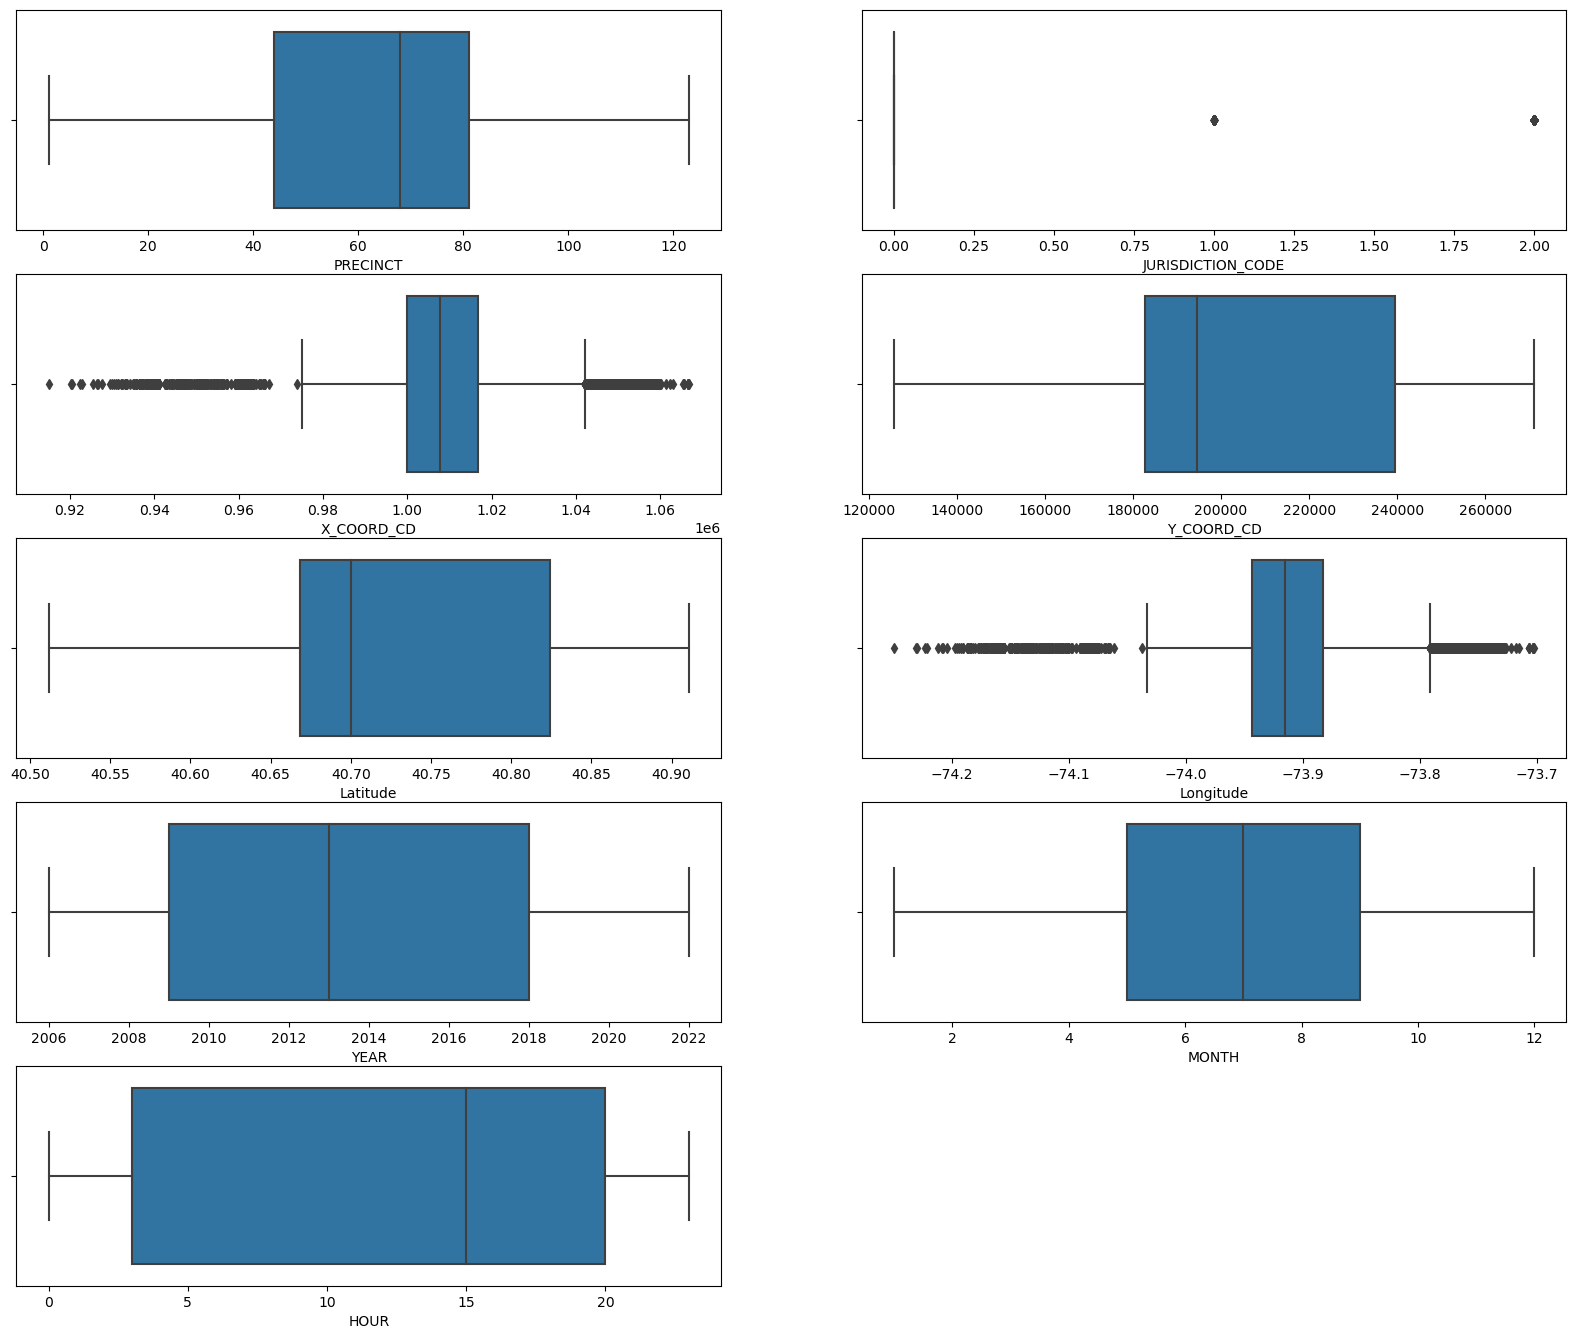

In [23]:
plt.figure(figsize=(20,20))

num_cols= ['PRECINCT','JURISDICTION_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','YEAR','MONTH','HOUR']

for i, cols in enumerate(num_cols):
    plt.subplot(6,2,i+1)
    sns.boxplot(x=df_1[cols])
plt.show()

##### Checking outliers for 'PERP_AGE_GROUP' and 'VIC_AGE_GROUP'.

##### Plotting a bar chart for 'PERP_AGE_GROUP' to check outliers

<Axes: xlabel='PERP_AGE_GROUP'>

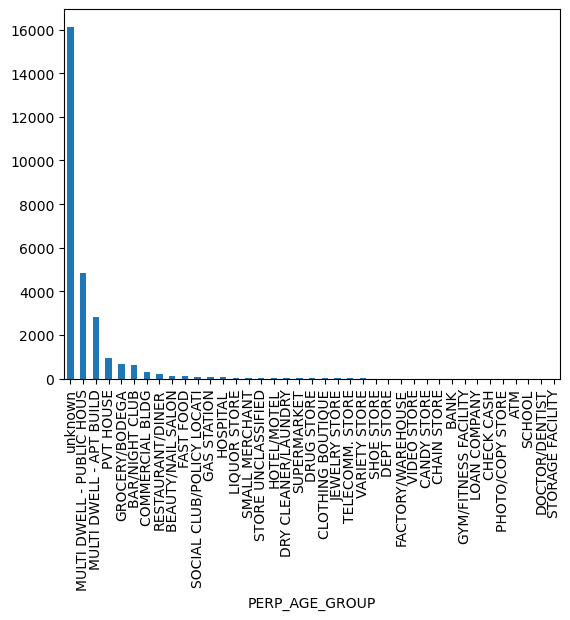

In [24]:
df_1['PERP_AGE_GROUP'].value_counts().plot(kind='bar')

###### It is now clear that 940, 224, and 1020 are outliers and we need to remove these rows.

##### Plotting a bar chart for 'VIC_AGE_GROUP' to check outliers

<Axes: xlabel='VIC_AGE_GROUP'>

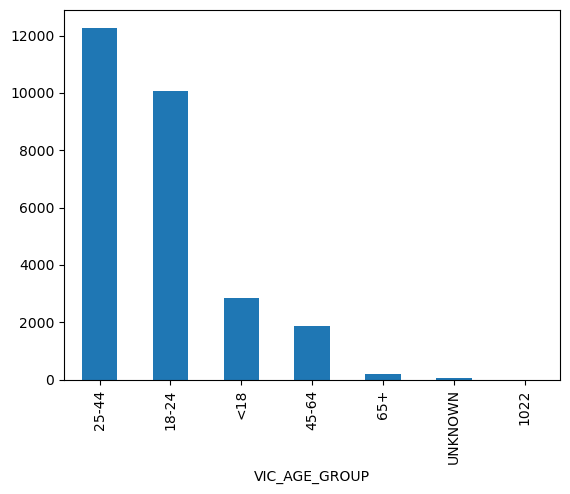

In [25]:
df_1['VIC_AGE_GROUP'].value_counts().plot(kind='bar')

###### It is now clear that 1022 is outlier and we need to remove this rows.

#### Removing the identified outliers

In [26]:
# Removing outliers
mask = df_1['VIC_AGE_GROUP'] != '1022'
df_1 = df_1[mask]

mask2 = df_1['PERP_AGE_GROUP'] != '1020'
df_1 = df_1[mask2]

mask3 = df_1['PERP_AGE_GROUP'] != '940'
df_1 = df_1[mask3]

mask4 = df_1['PERP_AGE_GROUP'] != '224'
df_1 = df_1[mask4]

# Exploratory Data Analysis (EDA)

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27311 entries, 0 to 27311
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BORO                     27311 non-null  object 
 1   PRECINCT                 27311 non-null  int64  
 2   JURISDICTION_CODE        27311 non-null  float64
 3   LOCATION_DESC            27311 non-null  object 
 4   STATISTICAL_MURDER_FLAG  27311 non-null  bool   
 5   PERP_AGE_GROUP           27311 non-null  object 
 6   PERP_SEX                 27311 non-null  object 
 7   PERP_RACE                27311 non-null  object 
 8   VIC_AGE_GROUP            27311 non-null  object 
 9   VIC_SEX                  27311 non-null  object 
 10  VIC_RACE                 27311 non-null  object 
 11  X_COORD_CD               27311 non-null  float64
 12  Y_COORD_CD               27311 non-null  float64
 13  Latitude                 27311 non-null  float64
 14  Longitude                27

### BORO Column

<Axes: xlabel='BORO'>

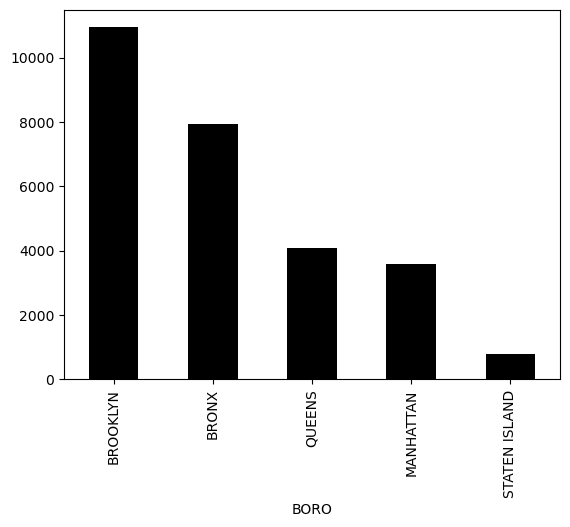

In [28]:
df_1['BORO'].value_counts().plot(kind='bar', color='black')

###### Brooklyn has most number of incidents where Staten Island has fewer in number.

### PRECINCT Column

In [29]:
# Checking max and min value
df_1['PRECINCT'].min(), df_1['PRECINCT'].max()

(1, 123)

Mean of Precinct is 65.63728900443044 .
Median of Precinct is  68.0 .
Mode of Precinct is  75 .


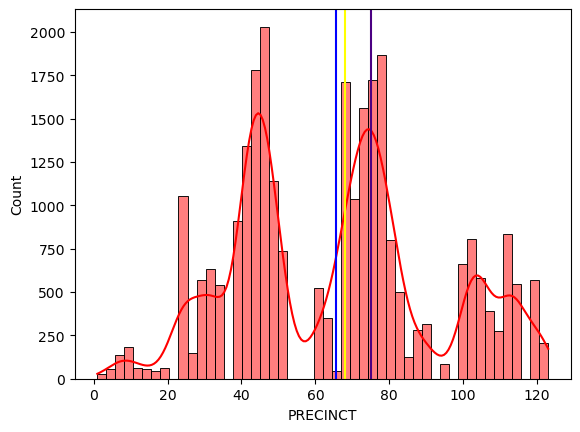

In [30]:
# Checking the distribution of PRECINCT column
# Mean of Precinct.
print('Mean of Precinct is',df_1['PRECINCT'].mean(),'.')

# Median of Precinct.
print('Median of Precinct is ',df_1['PRECINCT'].median(),'.')

# Mode of Precinct.
print('Mode of Precinct is ',df_1['PRECINCT'].mode()[0],'.')

# plotting mean, median and mode of age column.
sns.histplot(df_1['PRECINCT'], color= 'red', kde=True)
plt.axvline(df_1['PRECINCT'].mean(), color='blue')
plt.axvline(df_1['PRECINCT'].median(), color='yellow')
plt.axvline(df_1['PRECINCT'].mode()[0], color='indigo')
plt.show()

##### Most of the police precint are in between 60 and 80.

In [31]:
# Histogram for relation between PRECINCT and BORO
fig= px.histogram(data_frame=df_1, x='PRECINCT', color='BORO', barmode='group')
fig.show()

##### Most of the police precint are in Brooklyn area.

### JURISDICTION_CODE Column

In [32]:
print(df_1['JURISDICTION_CODE'].value_counts())
px.pie(data_frame=df_1,names='JURISDICTION_CODE')

JURISDICTION_CODE
0.0    22810
2.0     4427
1.0       74
Name: count, dtype: int64


##### 83.5% of the incidents have jurisdiction code 0.0.

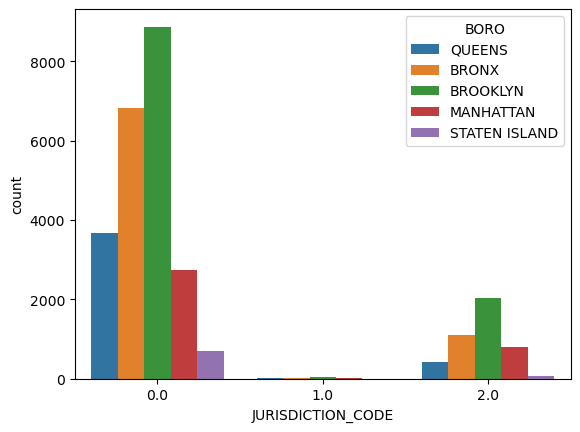

In [33]:
# Plotting countplot for "Jurisdiction Code" with respect to the 'Boro'
sns.countplot(data=df_1, x='JURISDICTION_CODE',hue='BORO')
plt.show()

In [34]:
# Jurisdiction Code and Precinct
fig= px.histogram(data_frame=df_1, x='PRECINCT', color='JURISDICTION_CODE')
fig.show()

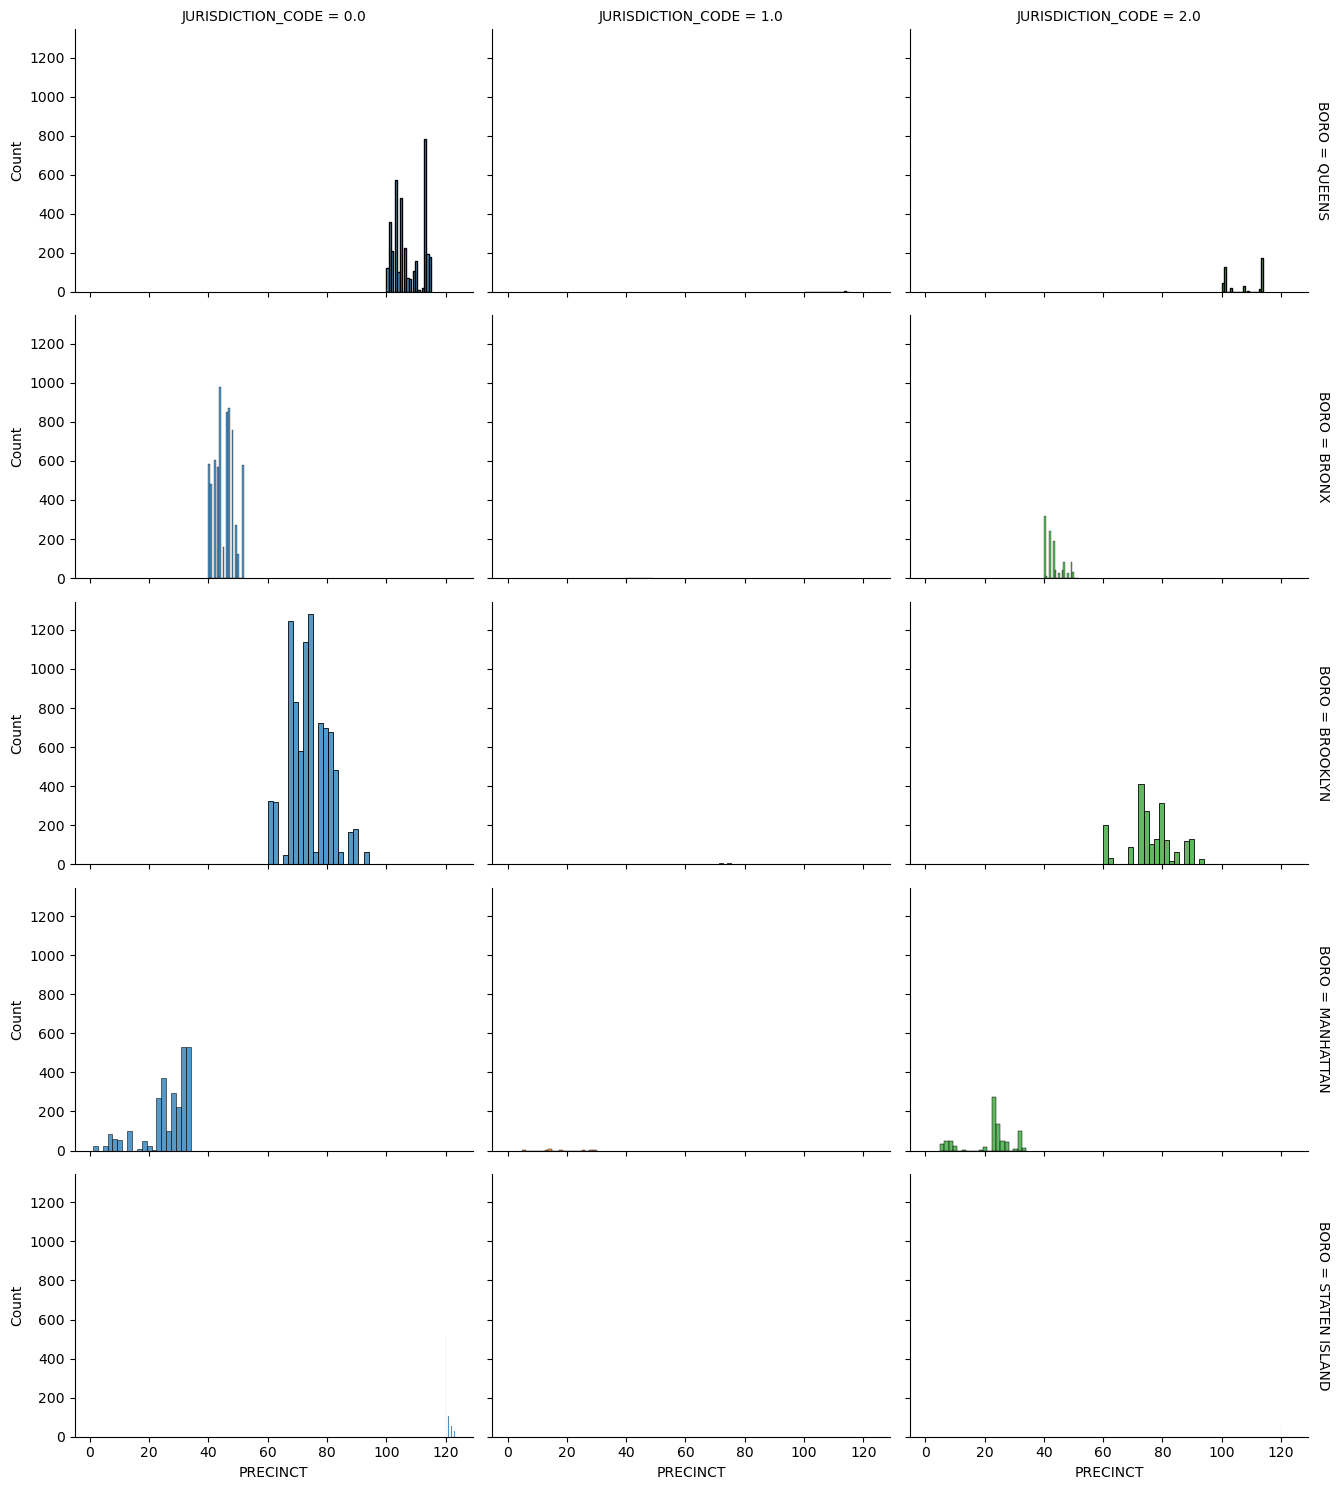

In [35]:
g = sns.FacetGrid(df_1, row='BORO', col='JURISDICTION_CODE', margin_titles=True, height=3, aspect=1.5, hue= 'JURISDICTION_CODE')
g.map(sns.histplot, 'PRECINCT', bins=20, kde=False)

### LOCATION_DESC Column

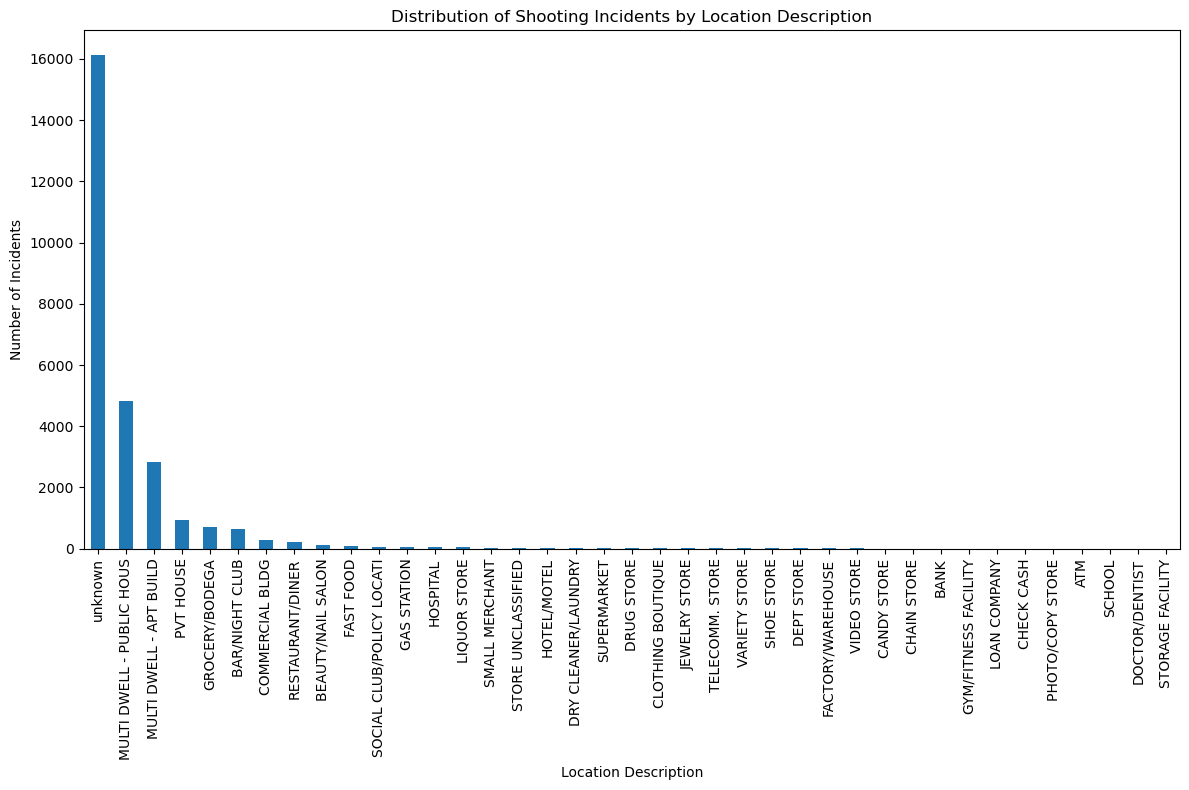

In [36]:
# Count the occurrences of each unique value in the 'LOCATION_DESC' column
location_desc_counts = df_1['LOCATION_DESC'].value_counts()

# Create a bar plot for visualization
plt.figure(figsize=(12, 8))
location_desc_counts.plot(kind='bar')
plt.title('Distribution of Shooting Incidents by Location Description')
plt.xlabel('Location Description')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


##### Most of the incidents are occured in unkonwn locations.

### PERP_AGE_GROUP, PERP_SEX and PERP_RACE Columns

<Figure size 1800x1200 with 0 Axes>

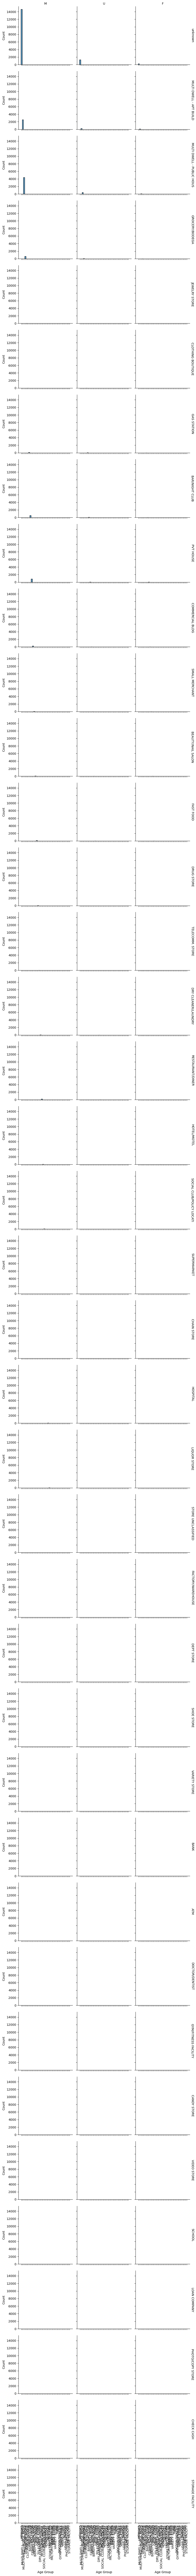

In [37]:
plt.figure(figsize=(18, 12))
facet = sns.FacetGrid(data=df_1, col="PERP_SEX", row="PERP_RACE", margin_titles=True)
facet.map(sns.histplot, "PERP_AGE_GROUP", bins=15, kde=False)

# Set titles and labels
facet.set_axis_labels("Age Group", "Count")
facet.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate x-axis labels for better readability
for ax in facet.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

##### Most of the perpetrator are black men with age of 18-24.

### VIC_AGE_GROUP, VIC_SEX and VIC_RACE Columns

<Figure size 1800x1200 with 0 Axes>

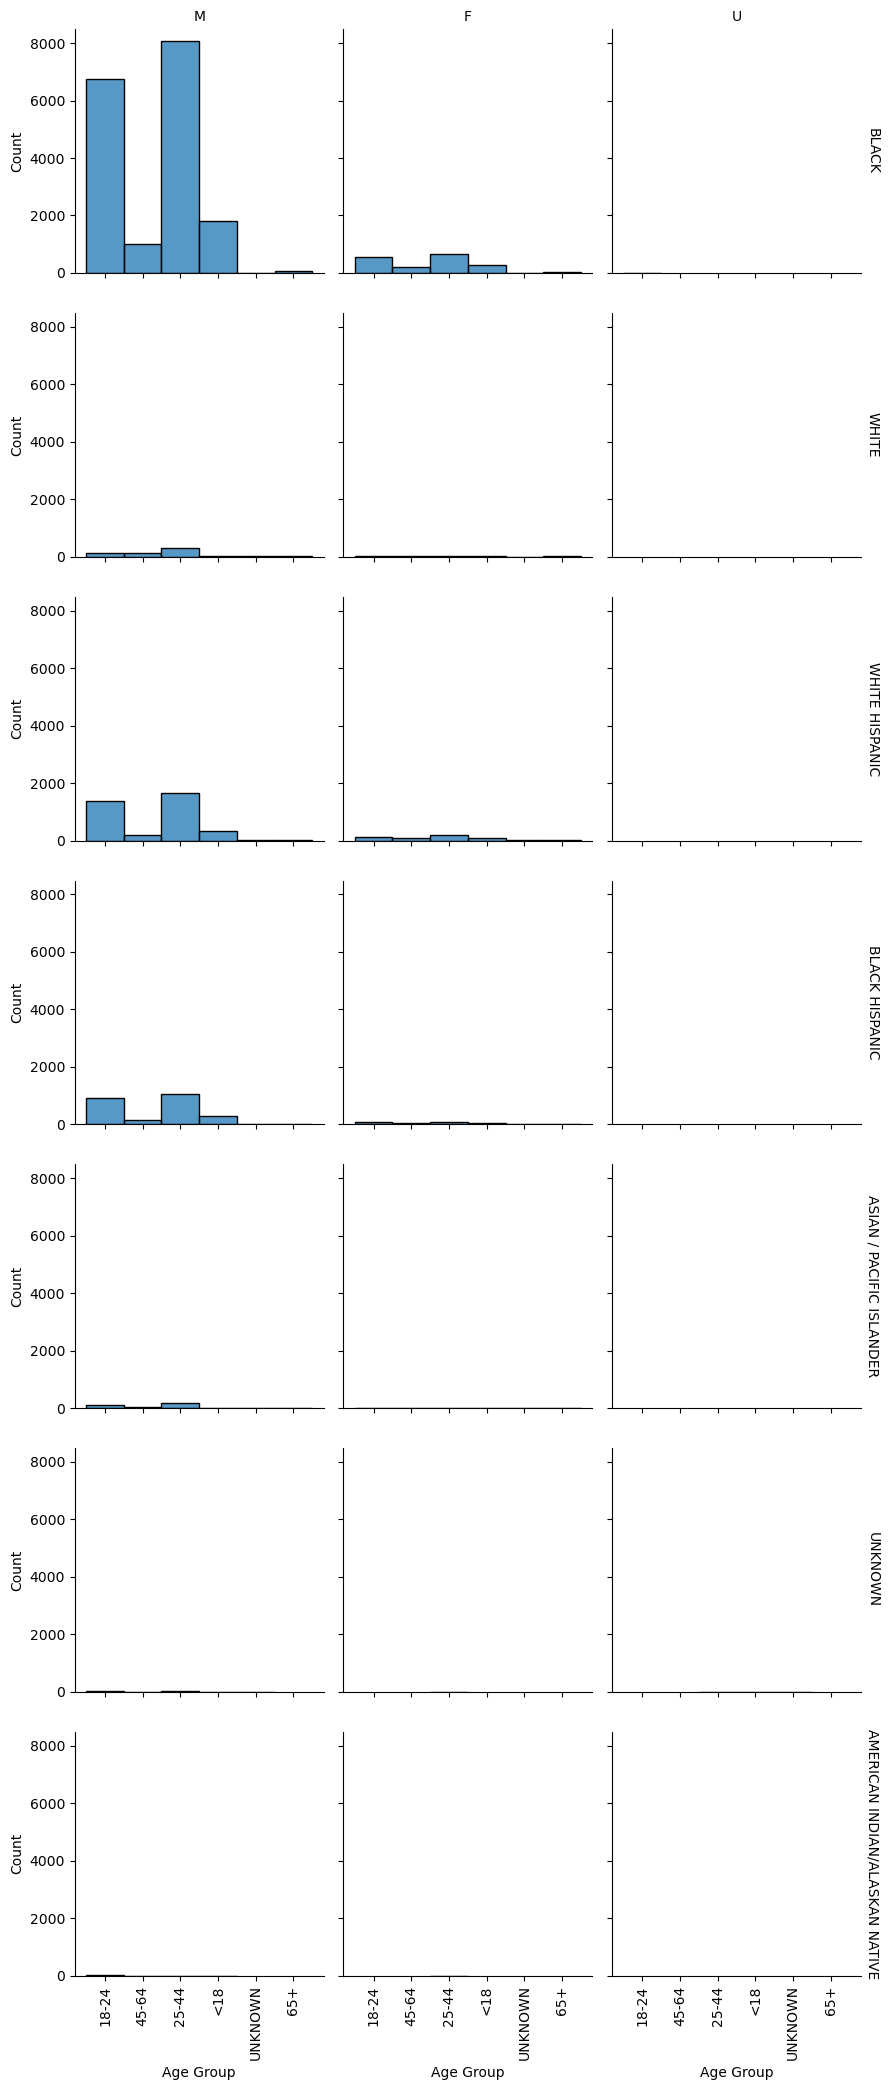

In [38]:
plt.figure(figsize=(18, 12))
facet = sns.FacetGrid(data=df_1, col="VIC_SEX", row="VIC_RACE", margin_titles=True)
facet.map(sns.histplot, "VIC_AGE_GROUP", bins=15, kde=False)

# Set titles and labels
facet.set_axis_labels("Age Group", "Count")
facet.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate x-axis labels for better readability
for ax in facet.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

##### Most of the victims are black men with age of 25-44.

## STATISTICAL_MURDER_FLAG (Target)

<Axes: xlabel='STATISTICAL_MURDER_FLAG'>

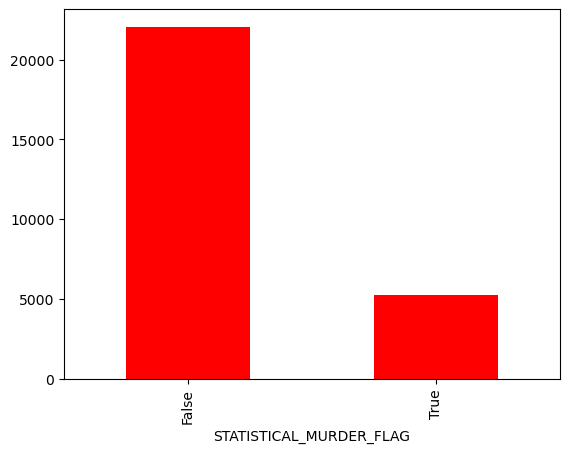

In [40]:
df['STATISTICAL_MURDER_FLAG'].value_counts().plot(kind='bar', color='red')

<Axes: ylabel='STATISTICAL_MURDER_FLAG'>

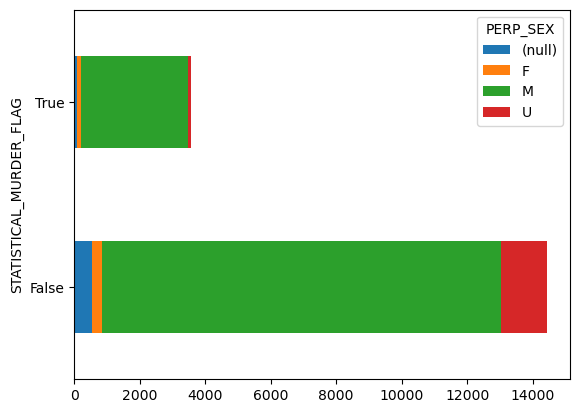

In [41]:
cross_tab = pd.crosstab(df_1['STATISTICAL_MURDER_FLAG'], df['PERP_SEX'])
cross_tab.plot.barh(stacked=True)

###### Comparing to the number of incidents, most of the men survived the incidents.

<Axes: ylabel='STATISTICAL_MURDER_FLAG'>

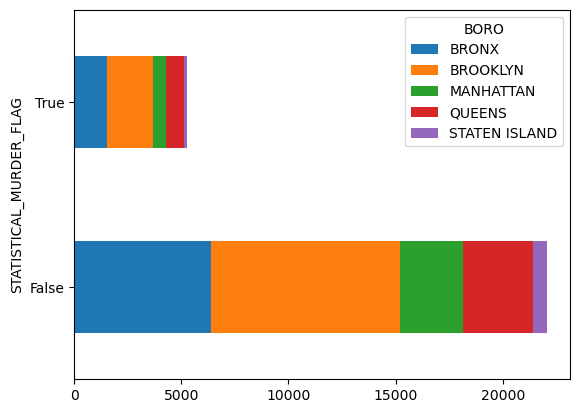

In [42]:
cross_tab = pd.crosstab(df_1['STATISTICAL_MURDER_FLAG'], df['BORO'])
cross_tab.plot.barh(stacked=True)

## YEAR Column

<Axes: xlabel='YEAR'>

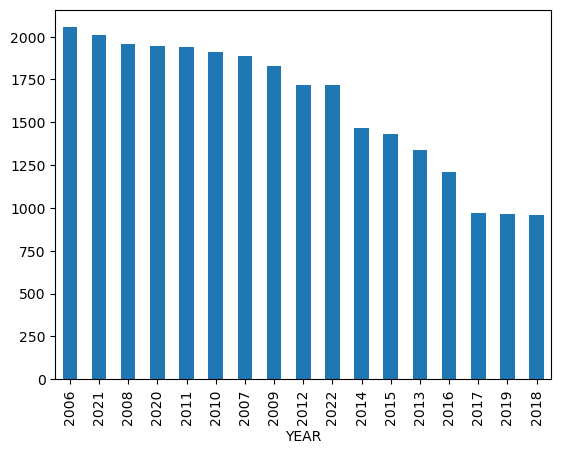

In [43]:
df_1["YEAR"].value_counts().plot(kind='bar')

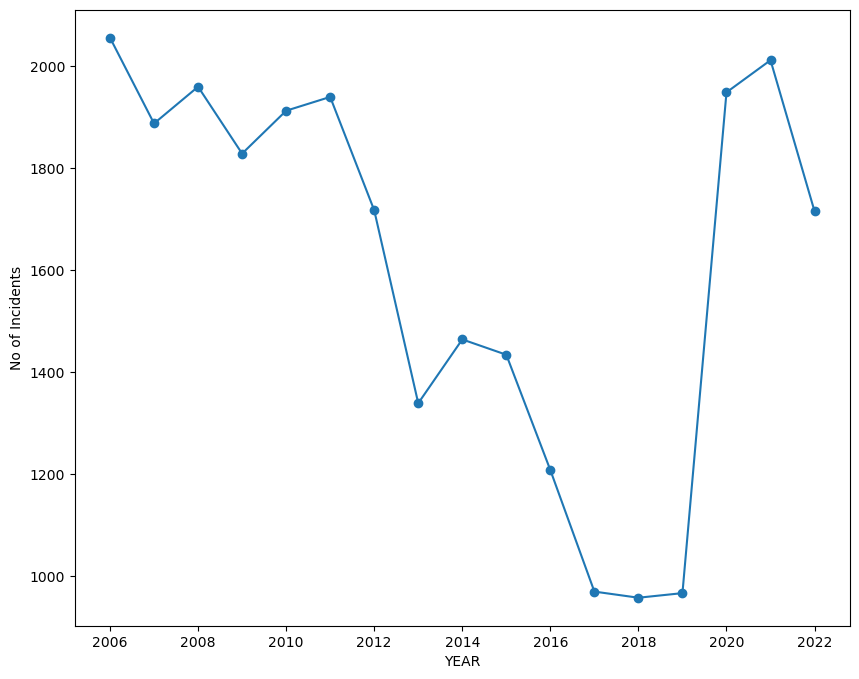

In [44]:
# Displaying the incidents took place Year wise
yearly_incidents= df_1['YEAR'].value_counts().sort_index()

plt.figure(figsize=(10,8))
yearly_incidents.plot(kind='line', marker='o')
plt.ylabel("No of Incidents")
plt.show()

##### Most number of incidents are recorded in 2006 which were then declined in 2017-19 and rose again in 2020.

## HOUR Column

<Axes: xlabel='HOUR'>

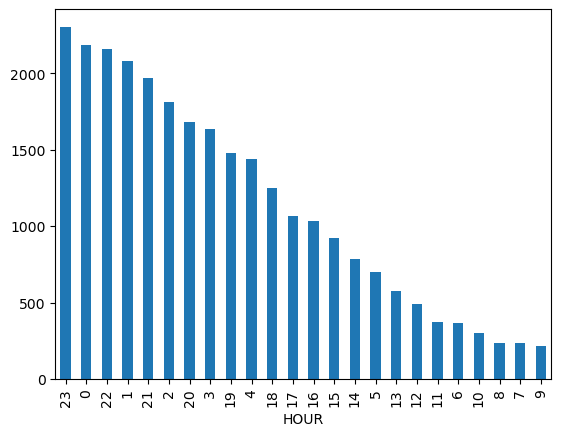

In [45]:
# Checking the time where incidents took place
df_1['HOUR'].value_counts().plot(kind='bar')

##### Most of the incidents are recorded in night time.

# Machine Learning

##### Splitting data into features and target

In [46]:
X= df_1.drop('STATISTICAL_MURDER_FLAG',axis=1)
y= df_1['STATISTICAL_MURDER_FLAG']

##### Encoding features by using separate label encoder

In [47]:
label_encoder= LabelEncoder()

for col in X.columns:
    if X[col].dtype=='object' or X[col].dtype== 'category':
        X[col]= label_encoder.fit_transform(X[col])
    else:
        pass
    



#### As the data is imbalanced with target variable having 80% of False and 20% of True, so I resample the data to avoid biasness in results.

In [48]:
from imblearn.combine import SMOTETomek


In [49]:
smk= SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)


Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\abdul\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\abdul\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\abdul\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 3: character maps to <undefined>
  File "C:\Users\abdul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


##### splitting the data into train_test

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X_res,y_res, test_size=0.2, random_state=42)


##### importing models used for prediction

In [51]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [52]:
X_train = np.array(X_train)
X_test = np.array(X_test)


##### Applying a loop to implement all the models and select the best one out of them.

In [53]:
import warnings
warnings.filterwarnings('ignore')
# Create a list of models to evaluate
models = [
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbor', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('LGBM Classifier', LGBMClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Variables to store the best model and its accuracy
best_model_name = None
best_accuracy = 0

for name, model in models:
    
    model.fit(X_train,y_train) #Training model
    
    # Making Prediction
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    
    # Training Set Performance
    model_train_accuracy= accuracy_score(y_train, y_train_pred)
    model_train_f1=f1_score(y_train, y_train_pred, average= 'weighted')
    model_train_precision= precision_score(y_train,y_train_pred,average= 'weighted')
    model_train_recall= recall_score(y_train,y_train_pred, average= 'weighted')
    
    # Test Set Performance
    model_test_accuracy= accuracy_score(y_test, y_test_pred)
    model_test_f1=f1_score(y_test, y_test_pred, average= 'weighted')
    model_test_precision= precision_score(y_test,y_test_pred,average= 'weighted')
    model_test_recall= recall_score(y_test,y_test_pred, average= 'weighted')
    
    print(name)
    print("Model Performance for Training Set")
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))
    
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    
    print("-----------------------------------------------------")
        
    print("Model Performance for Testing Set")
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    
    print("="*35)
    print('\n')
    # Update best model if current model's accuracy is higher
    if model_test_accuracy > best_accuracy:
        best_accuracy = model_test_accuracy
        best_model_name = name

# Output the best model
print("The model with the highest accuracy is:", best_model_name)
print("With an accuracy of: {:.4f}".format(best_accuracy))


LogisticRegression
Model Performance for Training Set
- Accuracy: 0.5533
- F1 score: 0.5530
- Precision: 0.5534
- Recall: 0.5533
-----------------------------------------------------
Model Performance for Testing Set
- Accuracy: 0.5516
- F1 score: 0.5513
- Precision: 0.5515
- Recall: 0.5516


K-Nearest Neighbor
Model Performance for Training Set
- Accuracy: 0.8347
- F1 score: 0.8341
- Precision: 0.8392
- Recall: 0.8347
-----------------------------------------------------
Model Performance for Testing Set
- Accuracy: 0.7541
- F1 score: 0.7530
- Precision: 0.7594
- Recall: 0.7541


Support Vector Machine
Model Performance for Training Set
- Accuracy: 0.5086
- F1 score: 0.5068
- Precision: 0.5086
- Recall: 0.5086
-----------------------------------------------------
Model Performance for Testing Set
- Accuracy: 0.5035
- F1 score: 0.5010
- Precision: 0.5043
- Recall: 0.5035


AdaBoost Classifier
Model Performance for Training Set
- Accuracy: 0.7167
- F1 score: 0.7159
- Precision: 0.7194
-

##### Applying the best model

In [54]:
model= RandomForestClassifier()

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred= model.predict(X_test)
y_pred

array([False, False,  True, ...,  True, False,  True])

In [57]:
from sklearn import metrics
conf_matrix= metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[3644,  559],
       [ 765, 3363]], dtype=int64)

## Hyperparameter Tuning

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

In [60]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [61]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [62]:
# Print the best parameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.8342585301187242


##### Applying the best model with best parameters.

In [63]:
model= RandomForestClassifier(bootstrap= False, max_depth= None,
                             max_features='sqrt', min_samples_leaf=2,
                             min_samples_split=2, n_estimators=200)

In [64]:

model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=False, min_samples_leaf=2, n_estimators=200)

In [65]:
y_pred= model.predict(X_test)
y_pred

array([False, False,  True, ...,  True, False,  True])

## Metrics

##### Accuracy

In [66]:
accuracy= metrics.accuracy_score(y_test,y_pred)
accuracy

0.8428760052814788

##### Confusion Matrix

In [67]:
conf_matrix= metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[3650,  553],
       [ 756, 3372]], dtype=int64)

#### Precision Score

In [71]:
precision= metrics.precision_score(y_test,y_pred)
precision

0.859108280254777

#### f1-score

In [72]:
f1score= metrics.f1_score(y_test,y_pred)
f1score

0.8374518812864771

#### roc_auc_score

In [75]:
roc_score= metrics.roc_auc_score(y_test,y_pred)
print(f"roc_score= {roc_score}")

roc_score= 0.8426438894698692


#### Confusion Matrix Display

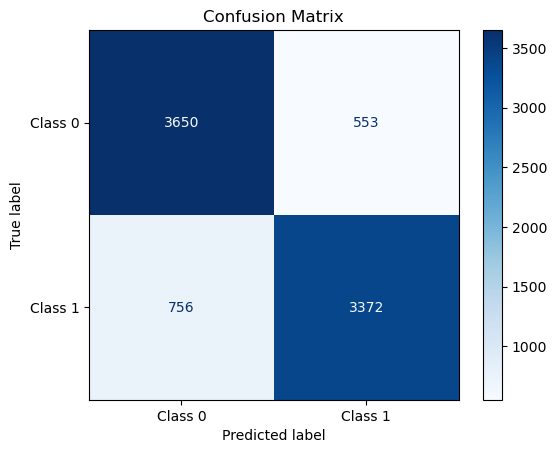

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()